# Your first deep neural network

# imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

# data

In [ ]:
NUM_CLASSES = 10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [ ]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [ ]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_4 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# train

In [ ]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9601 - accuracy: 0.2925
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6753 - accuracy: 0.4010
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5965 - accuracy: 0.4303
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5343 - accuracy: 0.4563
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4931 - accuracy: 0.4673
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4500 - accuracy: 0.4838
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4350 - accuracy: 0.4907
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4065 - accuracy: 0.5009
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3901 - accuracy: 0.5046
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.361

# analysis

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4763 - accuracy: 0.4746


[1.4762928485870361, 0.4745999872684479]

In [ ]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

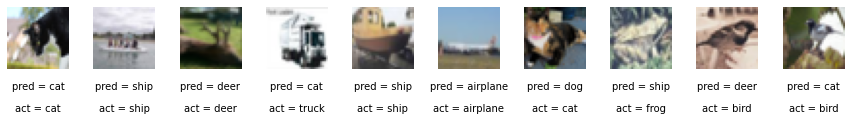

In [ ]:

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
